In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('heart_disease.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [3]:
df=pd.DataFrame(data)

In [4]:
colmn=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df.columns=colmn
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [5]:
for i in colmn:
    a=df[i].value_counts()
    print('Column:',i)
    print(df[i].unique())
    print(a)
    print('\n')

Column: age
[63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]
63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: age, dtype: int64


Column: sex
[1 0]
1    194
0      6
Name: sex, dtype: int64


Column: cp
[4 3 2 1]
4    131
3     47
2     14
1      8
Name: cp, dtype: int64


Column: trestbps
['140' '130' '132' '142' '110' '120' '150' '180' '160' '126' '?' '128'
 '170' '152' '116' '124' '0' '122' '144' '154' '125' '104' '136' '134'
 '138' '178' '146' '135' '158' '106' '112' '102' '96' '172' '155' '156'
 '118' '100' '190' '114' '127']
?      56
120    16
130    15
140    10
110     9
150     9
160     8
122     6
142 

Columns Slope, ca & thal have 102, 198 & 166 missing value '?'.

Since the the columns Slope, ca & thal have high percentage of missing value i.e 51%, 99% & 83% , we can drop the columns.

Column trestbps,chol,fbs,thalach,exang & oldpeak have 56,7,7,53,53 & 56 missing values'?'. The missing value is considerable, thus we can treat the column for nan values.

Column ‘Chol’ have 49 value count of ‘0’. But Cholesterol cannot be zero. Thus data is wrong. Thus we have to treat it.

In [6]:
df.drop({'slope','ca','thal'},axis=1,inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,4,140,260,0,1,112,1,3,2
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0


We have dropped columns 'slope','ca'&'thal'.

In [7]:
series=['trestbps','chol','fbs','thalach','exang','oldpeak']
for i in series:
    df[i]=df[i].replace('?',method ='ffill')

We have forward fill all '?' values

Thus , we verified there is no missing value '?' in the data.

In [8]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
target       int64
dtype: object

There 5 integer type columns and 6 string type columns

Since all coulmns have numerical value,  we can change the data type to float

In [9]:
for i in df.columns:
    df[i]=df[i].astype(float)

In [10]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
target      float64
dtype: object

In [11]:
df['chol'].mean()

181.545

In [12]:
df['chol']=df['chol'].replace(0,182)

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,59.350000,0.970000,3.505000,134.58000,226.135000,0.355000,0.735000,122.680000,0.635000,1.29600,1.520000
std,7.811697,0.171015,0.795701,20.44022,52.378568,0.479714,0.683455,21.749316,0.482638,1.12486,1.219441
min,35.000000,0.000000,1.000000,0.00000,100.000000,0.000000,0.000000,69.000000,0.000000,-0.50000,0.000000
25%,55.000000,1.000000,3.000000,120.00000,182.000000,0.000000,0.000000,108.000000,0.000000,0.00000,0.000000
50%,60.000000,1.000000,4.000000,130.00000,216.500000,0.000000,1.000000,120.000000,1.000000,1.50000,1.000000
75%,64.000000,1.000000,4.000000,150.00000,258.000000,1.000000,1.000000,140.000000,1.000000,2.00000,3.000000
max,77.000000,1.000000,4.000000,190.00000,458.000000,1.000000,2.000000,180.000000,1.000000,4.00000,4.000000


There are outliers in Age, trestbps, chol & thalach.

In [14]:
for i in df.columns:
    a=df[i].value_counts()
    print('Column',i)
    print(df[i].unique())
    print(a)

Column age
[63. 44. 60. 55. 66. 65. 56. 59. 62. 57. 46. 58. 64. 74. 52. 69. 51. 54.
 77. 61. 40. 41. 42. 53. 68. 67. 72. 75. 49. 35. 43. 48. 50. 45. 76. 70.
 71. 38. 37.]
63.0    15
62.0    15
55.0    14
58.0    12
60.0    12
61.0    12
57.0    10
56.0     9
64.0     9
69.0     8
59.0     8
54.0     7
51.0     7
65.0     6
67.0     5
74.0     5
53.0     5
68.0     4
48.0     4
72.0     3
75.0     3
66.0     3
46.0     2
71.0     2
50.0     2
52.0     2
40.0     2
41.0     2
49.0     2
77.0     1
45.0     1
38.0     1
76.0     1
42.0     1
35.0     1
70.0     1
43.0     1
44.0     1
37.0     1
Name: age, dtype: int64
Column sex
[1. 0.]
1.0    194
0.0      6
Name: sex, dtype: int64
Column cp
[4. 3. 2. 1.]
4.0    131
3.0     47
2.0     14
1.0      8
Name: cp, dtype: int64
Column trestbps
[140. 130. 132. 142. 110. 120. 150. 180. 160. 126. 128. 170. 152. 116.
 124.   0. 122. 144. 154. 125. 104. 136. 134. 138. 178. 146. 135. 158.
 106. 112. 102.  96. 172. 155. 156. 118. 100. 190. 114. 127.]


In [15]:
from scipy.stats import zscore

In [16]:
z=np.abs(zscore(df))
df2=df[(z<3).all(axis=1)]

In [17]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,2.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,0.0


In [18]:
df2.shape

(181, 11)

In [19]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,181.000000,181.0,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,59.348066,1.0,3.618785,135.558011,222.861878,0.337017,0.745856,122.707182,0.657459,1.304972,1.569061
std,7.746351,0.0,0.608715,18.433159,46.762494,0.474002,0.684387,21.248984,0.475876,1.140140,1.211947
min,37.000000,1.0,2.000000,96.000000,100.000000,0.000000,0.000000,73.000000,0.000000,-0.500000,0.000000
25%,55.000000,1.0,3.000000,122.000000,182.000000,0.000000,0.000000,110.000000,0.000000,0.000000,1.000000
50%,60.000000,1.0,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,1.000000
75%,63.000000,1.0,4.000000,150.000000,254.000000,1.000000,1.000000,140.000000,1.000000,2.000000,3.000000
max,77.000000,1.0,4.000000,190.000000,369.000000,1.000000,2.000000,180.000000,1.000000,4.000000,4.000000


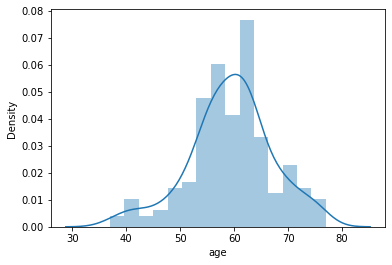

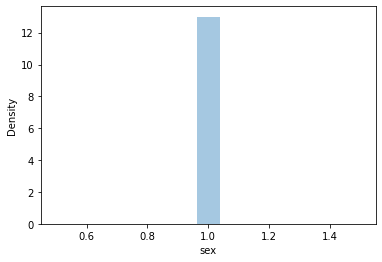

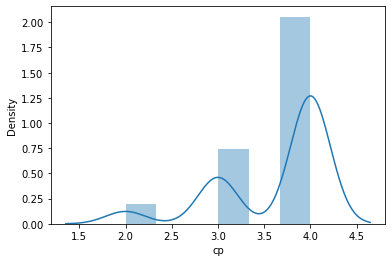

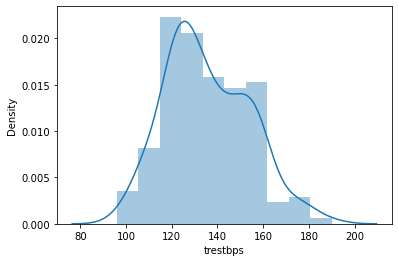

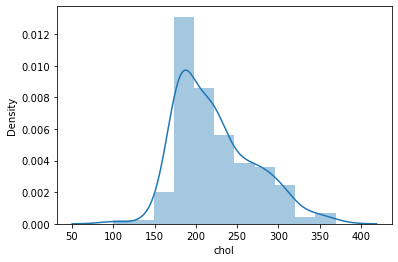

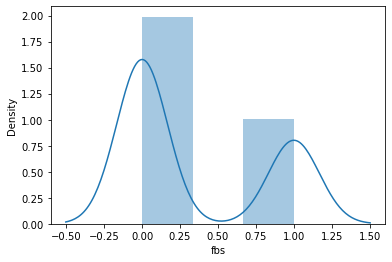

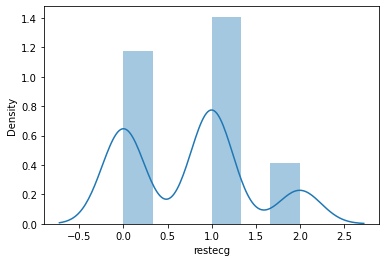

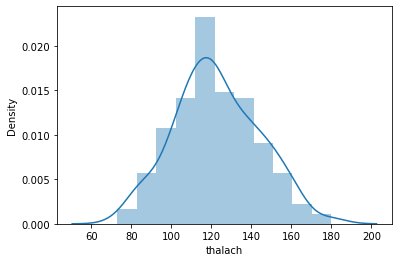

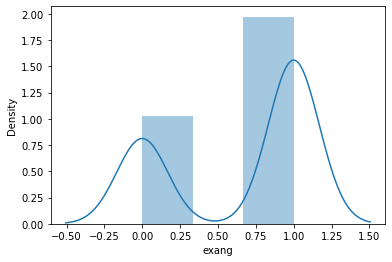

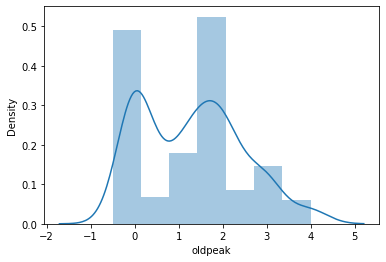

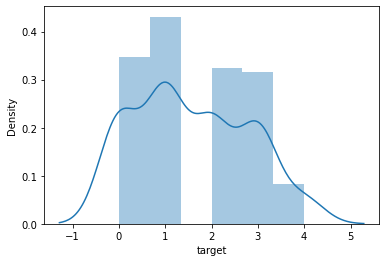

In [20]:
for i in df2.columns:
    plt.figure
    sns.distplot(df2[i])
    plt.show()

since there is only one unique (1) left in 'sex' column, we can drop it 

In [21]:
df2.drop('sex',axis=1,inplace=True)

In [22]:
df2.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0
1,44.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,0.0
2,60.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,2.0
3,55.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0
4,66.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,0.0


In [23]:
df2['target'].replace([2,3,4],1, inplace=True)

In [24]:
df2['target'].value_counts()

1.0    139
0.0     42
Name: target, dtype: int64

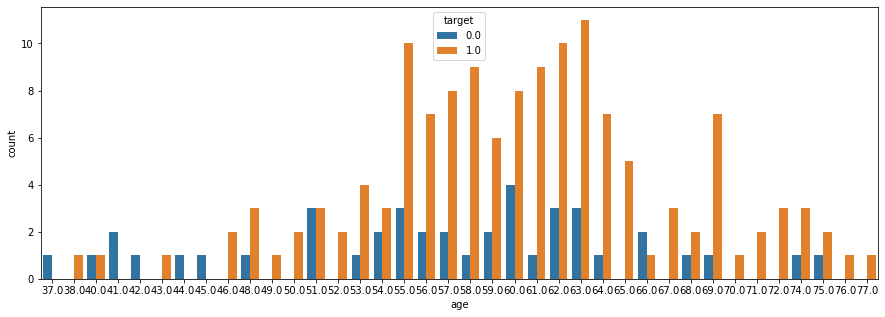

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x='age',hue='target',data=df2)
plt.show()

he can interpret that at younger age changes for heart disease is low. 

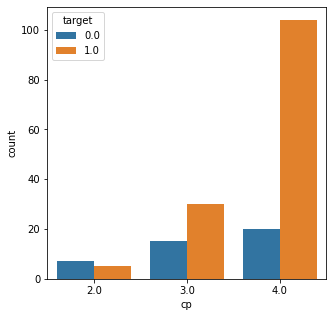

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(x='cp',hue='target',data=df2)
plt.show()

we can interpret patience have type 4 of CP have more chances to get heart disease.

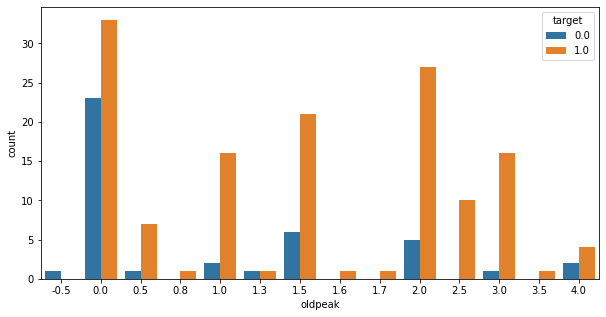

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='oldpeak',hue='target',data=df2)
plt.show()

with the increase of oldpeak value , probability of heart diseases increases.

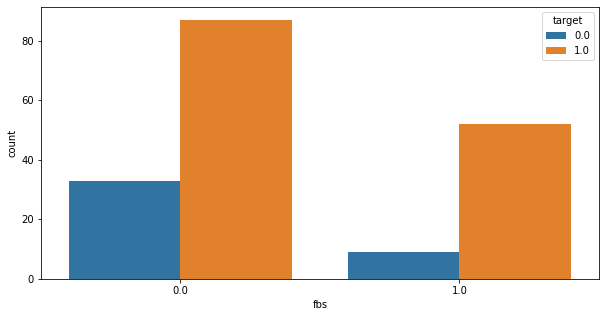

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='fbs',hue='target',data=df2)
plt.show()

We can observe patience have more fasting sugar level, tend to have more chances to get heart disease.

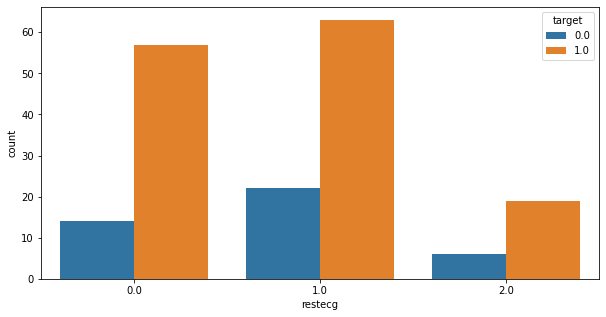

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='restecg',hue='target',data=df2)
plt.show()

Patience having restecg value (1 = having ST-T) & (2 = hypertrophy), chances for heart diseases is less than 0 =normal.

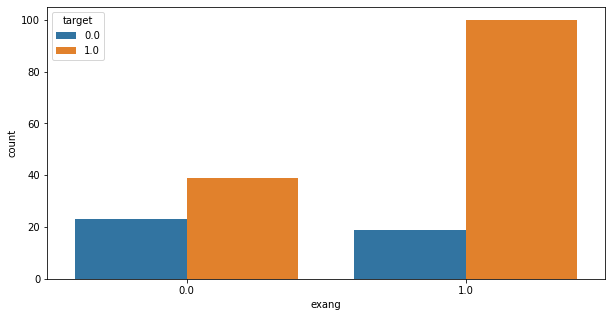

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='exang',hue='target',data=df2)
plt.show()

Exercise induced angina is seen more in patience having heart problem.

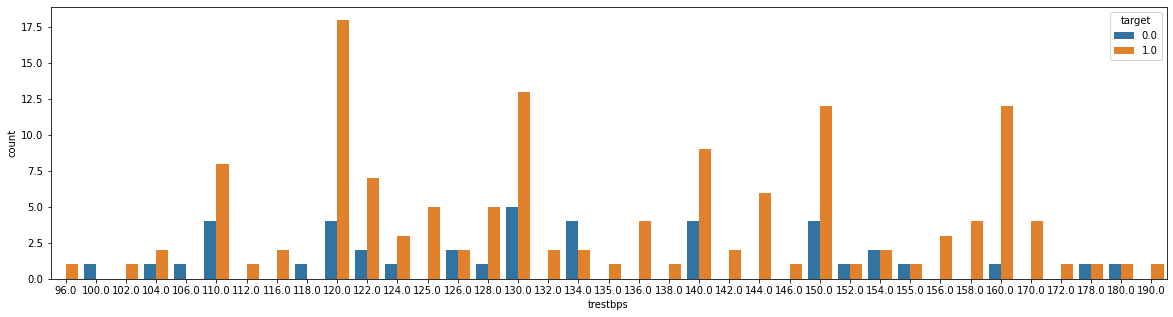

In [31]:
plt.figure(figsize=(20,5))
sns.countplot(x='trestbps',hue='target',data=df2)
plt.show()

Patience having high trestbps(Resting blood pressure) tends to have more chances of Heart diseases

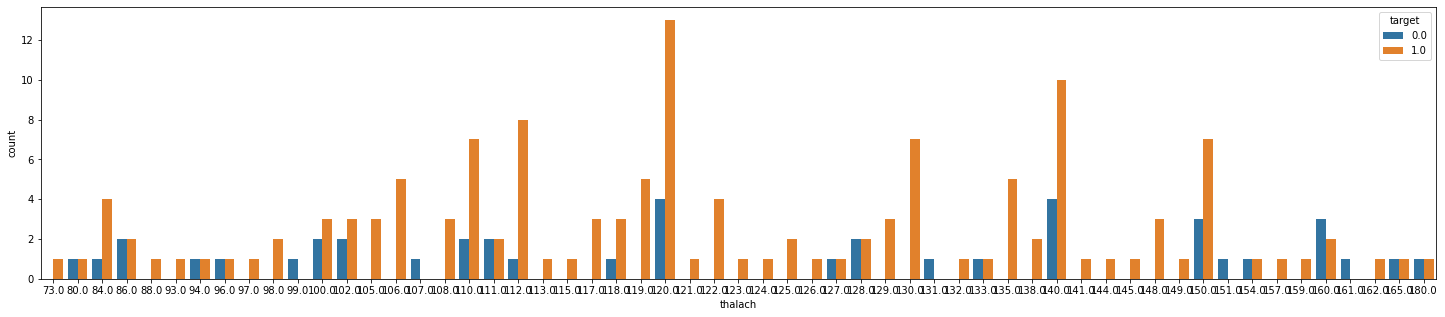

In [32]:
plt.figure(figsize=(25,5))
sns.countplot(x='thalach',hue='target',data=df2)
plt.show()

Heart disease changes is high between 100-150 value of thalach(maximum heart rate achieved).

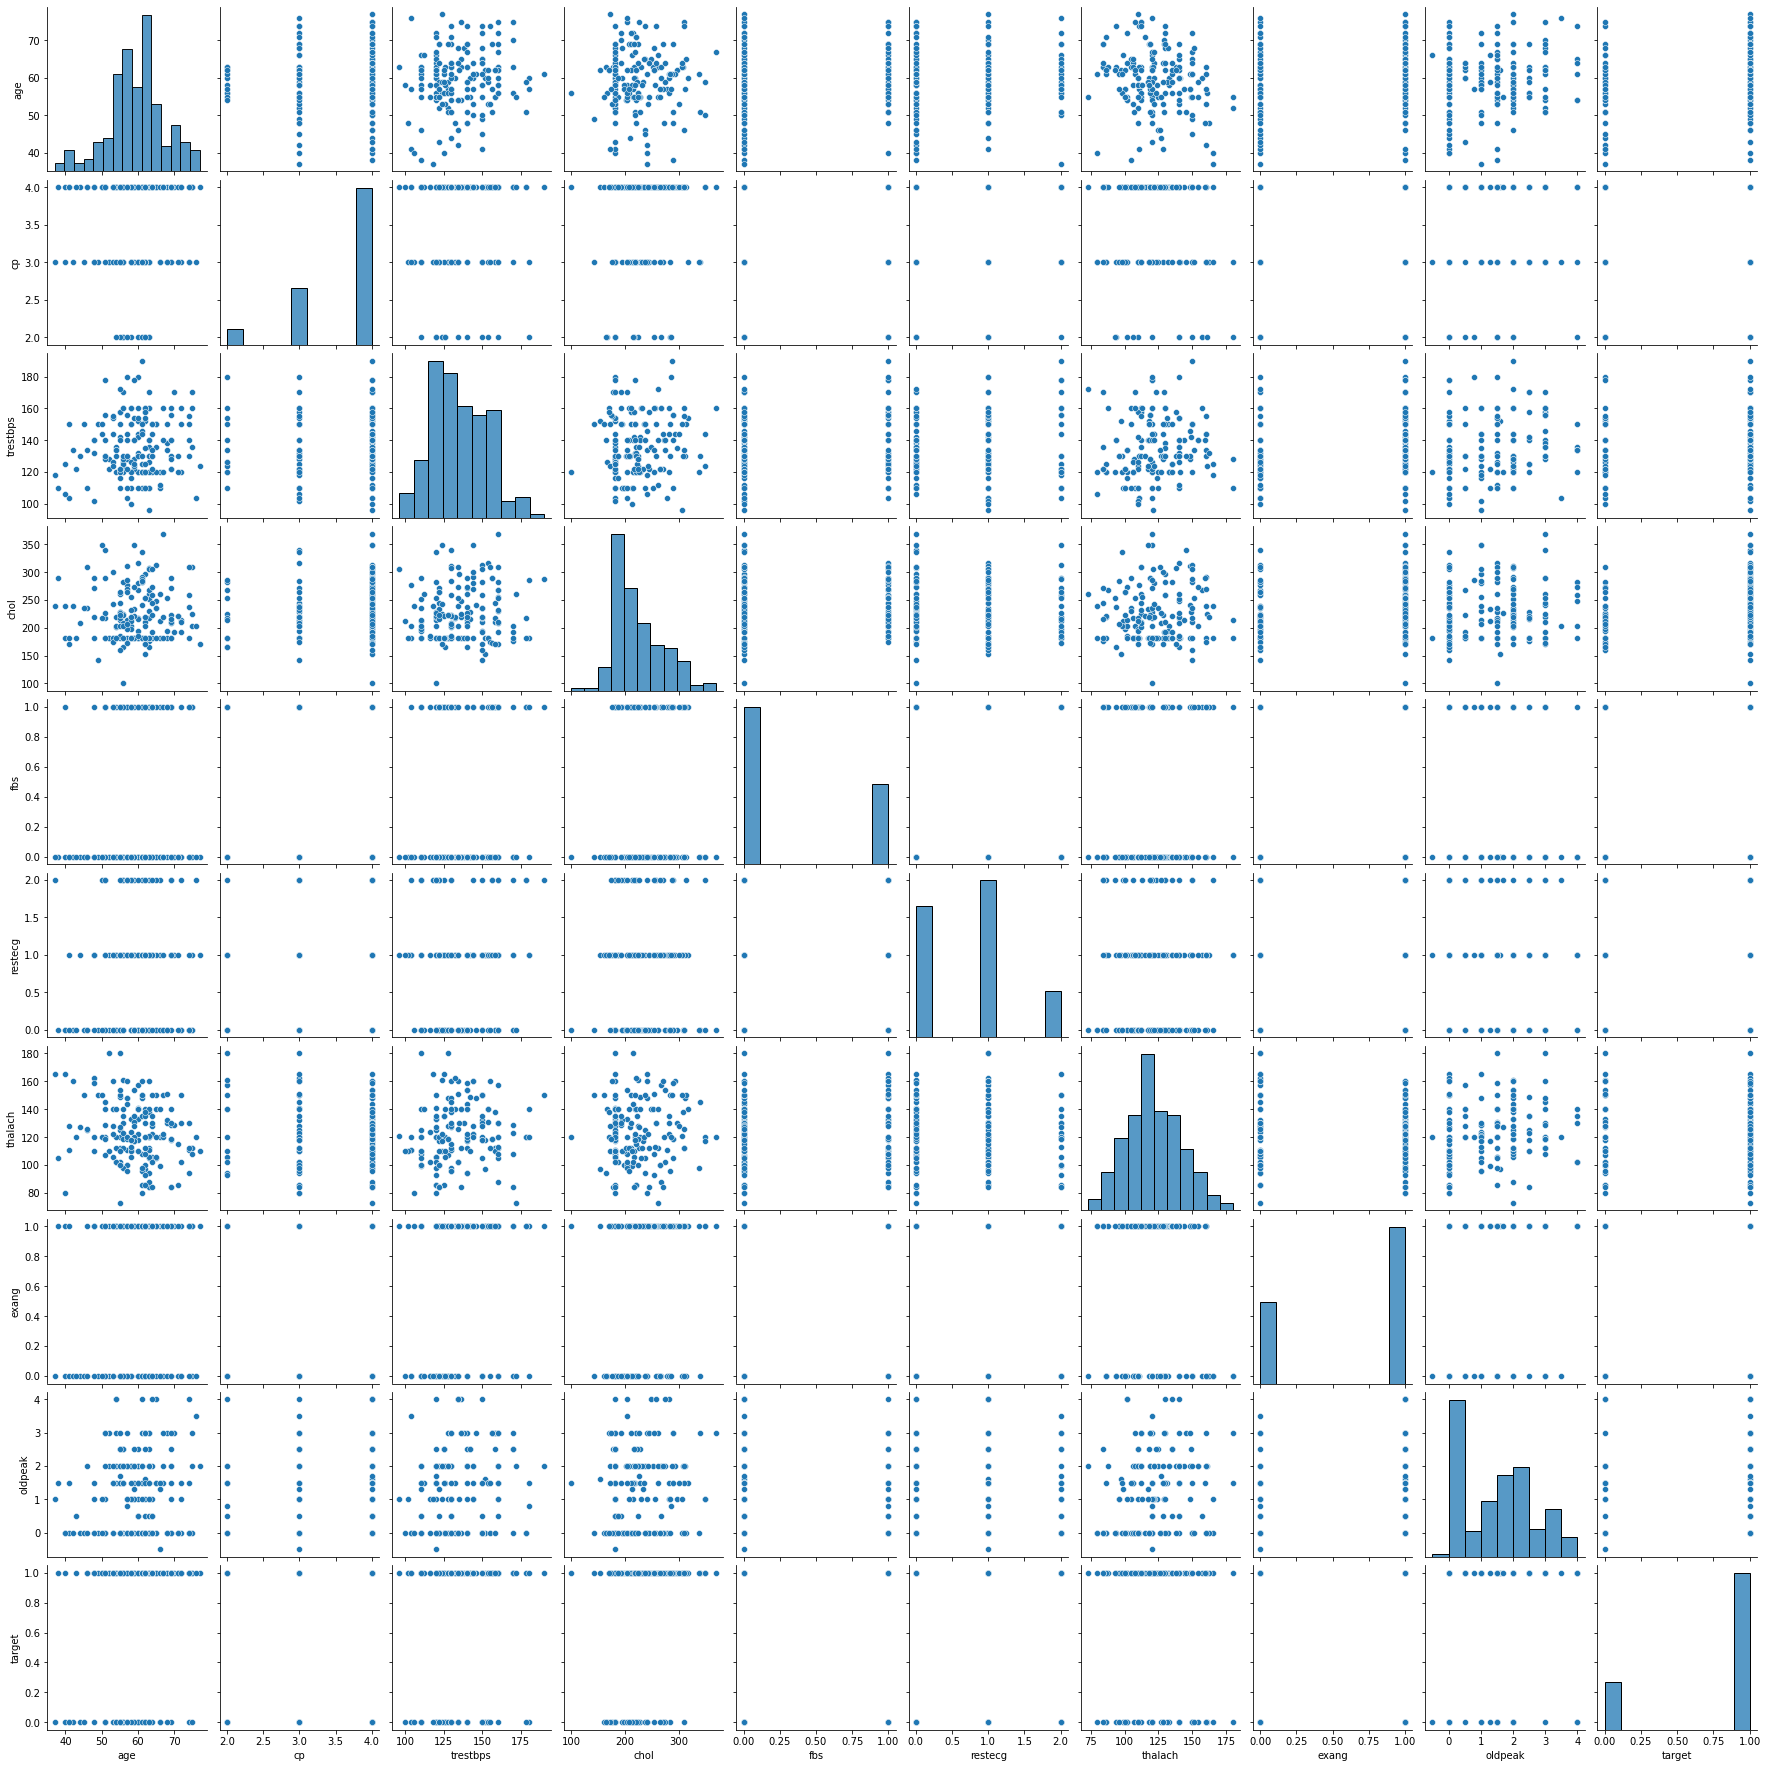

In [33]:
sns.pairplot(df2)

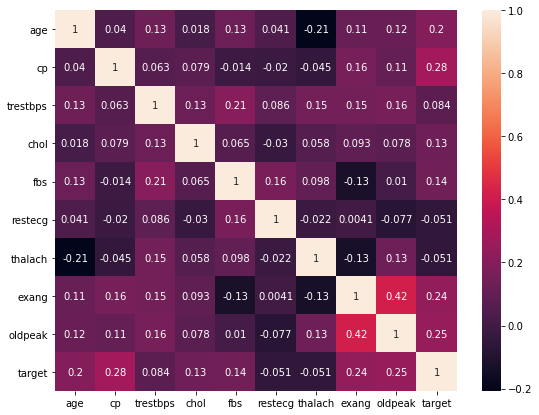

In [34]:
plt.figure(figsize=(9,7))
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [35]:
df2.drop({'thalach','restecg'},axis=1,inplace=True)
df2.head()

,age,cp,trestbps,chol,fbs,exang,oldpeak,target
0,63.0,4.0,140.0,260.0,0.0,1.0,3.0,1.0
1,44.0,4.0,130.0,209.0,0.0,0.0,0.0,0.0
2,60.0,4.0,132.0,218.0,0.0,1.0,1.5,1.0
3,55.0,4.0,142.0,228.0,0.0,1.0,2.5,1.0
4,66.0,3.0,110.0,213.0,1.0,1.0,1.3,0.0


In [36]:
x=df2.drop(['target'],axis=1)
x.head(5)

,age,cp,trestbps,chol,fbs,exang,oldpeak
0,63.0,4.0,140.0,260.0,0.0,1.0,3.0
1,44.0,4.0,130.0,209.0,0.0,0.0,0.0
2,60.0,4.0,132.0,218.0,0.0,1.0,1.5
3,55.0,4.0,142.0,228.0,0.0,1.0,2.5
4,66.0,3.0,110.0,213.0,1.0,1.0,1.3


In [37]:
x.shape

(181, 7)

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.47274696,  0.62799976,  0.24164663, ..., -0.71297499,
         0.72180912,  1.49080751],
       [-1.98682459,  0.62799976, -0.30235885, ..., -0.71297499,
        -1.38540782, -1.14774685],
       [ 0.08439356,  0.62799976, -0.19355775, ..., -0.71297499,
         0.72180912,  0.17153033],
       ...,
       [-1.72792232,  0.62799976, -0.08475665, ..., -0.71297499,
        -1.38540782, -1.14774685],
       [-0.56286211,  0.62799976, -0.73756323, ...,  1.40257375,
        -1.38540782, -1.14774685],
       [ 0.34329583, -2.66672362, -0.84636433, ..., -0.71297499,
         0.72180912, -1.14774685]])

In [39]:
y=df2['target']
y

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
192    1.0
193    1.0
194    1.0
197    1.0
199    1.0
Name: target, Length: 181, dtype: float64

In [40]:
y.shape

(181,)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

In [42]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

LogisticRegression()
Accuracy score : 0.7837837837837838
Confusion matrix :
 [[ 4  6]
 [ 2 25]]
Classification report: 
                precision    recall  f1-score   support

         0.0       0.67      0.40      0.50        10
         1.0       0.81      0.93      0.86        27

    accuracy                           0.78        37
   macro avg       0.74      0.66      0.68        37
weighted avg       0.77      0.78      0.76        37

*************************************************


auc_score= 0.662962962962963




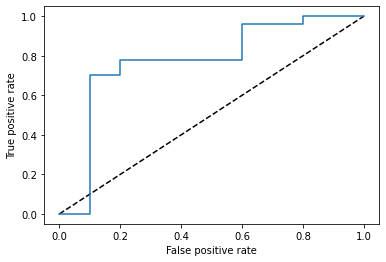

DecisionTreeClassifier()
Accuracy score : 0.7027027027027027
Confusion matrix :
 [[ 4  6]
 [ 5 22]]
Classification report: 
                precision    recall  f1-score   support

         0.0       0.44      0.40      0.42        10
         1.0       0.79      0.81      0.80        27

    accuracy                           0.70        37
   macro avg       0.62      0.61      0.61        37
weighted avg       0.69      0.70      0.70        37

*************************************************


auc_score= 0.6074074074074074




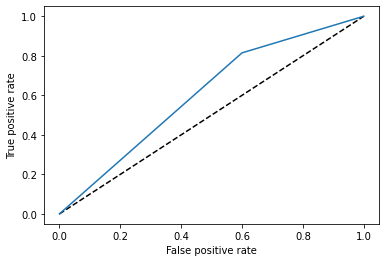

KNeighborsClassifier()
Accuracy score : 0.7567567567567568
Confusion matrix :
 [[ 2  8]
 [ 1 26]]
Classification report: 
                precision    recall  f1-score   support

         0.0       0.67      0.20      0.31        10
         1.0       0.76      0.96      0.85        27

    accuracy                           0.76        37
   macro avg       0.72      0.58      0.58        37
weighted avg       0.74      0.76      0.71        37

*************************************************


auc_score= 0.5814814814814815




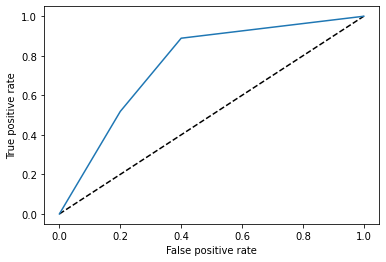

In [46]:
model=[LogisticRegression(),DecisionTreeClassifier(), KNeighborsClassifier()]
for i in model:
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    y_pred_pro=i.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_pro)
    print('Accuracy score :', accuracy_score(y_test,pred))
    print('Confusion matrix :\n', confusion_matrix(y_test,pred))
    print('Classification report: \n ', classification_report(y_test,pred))
    print('*************************************************')
    print('\n')
    print('auc_score=',roc_auc_score(y_test,pred))
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()

Accuracy score : 0.7567567567567568
Confusion matrix :
 [[ 2  8]
 [ 1 26]]
Classification report: 
                precision    recall  f1-score   support

         0.0       0.67      0.20      0.31        10
         1.0       0.76      0.96      0.85        27

    accuracy                           0.76        37
   macro avg       0.72      0.58      0.58        37
weighted avg       0.74      0.76      0.71        37

auc_score= 0.5814814814814815


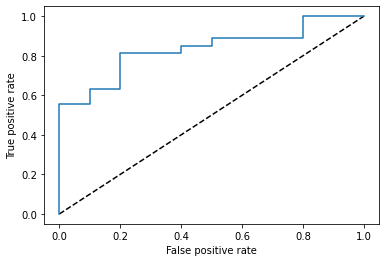

In [45]:
    svc=SVC(probability=True)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    y_pred_pro=svc.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_pro)
    print('Accuracy score :', accuracy_score(y_test,pred))
    print('Confusion matrix :\n', confusion_matrix(y_test,pred))
    print('Classification report: \n ', classification_report(y_test,pred))
    print('auc_score=',roc_auc_score(y_test,pred))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    

# ENSEMBLE TECHNIQUE

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)
print('Accuracy score :', accuracy_score(y_test,pred))
print('Confusion matrix :\n', confusion_matrix(y_test,pred2))
print('Classification report: \n ', classification_report(y_test,pred2))

Accuracy score : 0.7567567567567568
Confusion matrix :
 [[ 2  8]
 [ 1 26]]
Classification report: 
                precision    recall  f1-score   support

         0.0       0.67      0.20      0.31        10
         1.0       0.76      0.96      0.85        27

    accuracy                           0.76        37
   macro avg       0.72      0.58      0.58        37
weighted avg       0.74      0.76      0.71        37



# Hyperparameter Tunning

In [48]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1,10],'random_state': range(42,100)}
lg=LogisticRegression()
Grid=GridSearchCV(lg,parameters)
Grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10], 'random_state': range(42, 100)})

In [49]:
Grid.best_params_

{'C': 1, 'random_state': 42}

Since it is the default parameters, we will that only.

In [50]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred3=lg.predict(x_test)

# Saving the best model

In [51]:
import joblib

In [52]:
joblib.dump(lg,'Heart_Disease.pkl')

['Heart_Disease.pkl']